In [1]:
import pandas as pd
import os
import glob

def load_fsec_data_combined(directory='input', include_filename=False, filename_column='filename'):
    """
    Loads FSEC data from all CSV files in a specified directory and combines them
    into a single DataFrame.

    Args:
        directory (str, optional): The directory containing the CSV files.
            Defaults to 'input'.
        include_filename (bool, optional): Whether to include a column with the
            original filename. Defaults to False.
        filename_column (str, optional): The name of the column to store
            filenames (if include_filename is True). Defaults to 'filename'.

    Returns:
        pandas.DataFrame: A single DataFrame containing all the FSEC data.
            Returns an empty DataFrame if no CSV files are found.
        Raises FileNotFoundError if the input directory doesn't exist.

    """

    if not os.path.isdir(directory):
        raise FileNotFoundError(f"Error: Directory '{directory}' not found.")

    csv_files = glob.glob(os.path.join(directory, "*.csv"))

    if not csv_files:
        print(f"Warning: No CSV files found in '{directory}'.")
        return pd.DataFrame()  # Return an empty DataFrame

    all_data = []
    for file_path in csv_files:
        try:
            df = pd.read_csv(file_path)
            if include_filename:
                filename = os.path.splitext(os.path.basename(file_path))[0]
                df[filename_column] = filename  # Add filename as a column
            all_data.append(df)
        except pd.errors.EmptyDataError:
            print(f"Error: The file '{file_path}' is empty. Skipping.")
        except pd.errors.ParserError:
            print(f"Error: Could not parse the file '{file_path}'. Skipping.")
        except Exception as e:
            print(f"An unexpected error occurred while processing '{file_path}': {e}. Skipping.")

    if not all_data:  # Check if all_data is empty (e.g., all files were skipped)
        print("Warning: No data could be loaded from any files.")
        return pd.DataFrame()

    # Concatenate all DataFrames in the list
    combined_df = pd.concat(all_data, ignore_index=True)
    return combined_df


# Example Usage:
try:
    # Load data, including filenames in a 'source_file' column
    combined_fsec_df = load_fsec_data_combined(include_filename=True, filename_column='source_file')

    if not combined_fsec_df.empty:  # Check if the DataFrame is empty
        print(combined_fsec_df.head())
        print(combined_fsec_df.info())
        print(combined_fsec_df.describe())


except FileNotFoundError as e:
    print(e)

   Timepoint  001_48_Hi5_AdvanCD.dx_FLD1A  002_49_Hi5_AdvanCD.dx_FLD1A  \
0     0.0000                    13.893243                    14.109412   
1     0.0072                    13.842530                    14.087176   
2     0.0144                    13.795072                    14.068946   
3     0.0216                    13.764244                    14.055745   
4     0.0288                    13.750670                    14.047751   

   003_50_Hi5_AdvanCD.dx_FLD1A  004_51_Hi5_AdvanCD.dx_FLD1A  \
0                    14.100152                    14.021543   
1                    14.055465                    14.031919   
2                    14.025981                    14.036215   
3                    14.010621                    14.035290   
4                    14.005141                    14.031244   

   005_52_Hi5_AdvanCD.dx_FLD1A  006_53_Hi5_AdvanCD.dx_FLD1A  \
0                    13.928478                    13.956547   
1                    13.933206                    

In [2]:
combined_fsec_df

,Timepoint,001_48_Hi5_AdvanCD.dx_FLD1A,002_49_Hi5_AdvanCD.dx_FLD1A,003_50_Hi5_AdvanCD.dx_FLD1A,004_51_Hi5_AdvanCD.dx_FLD1A,005_52_Hi5_AdvanCD.dx_FLD1A,006_53_Hi5_AdvanCD.dx_FLD1A,007_54_Hi5_AdvanCD.dx_FLD1A,009_56_Hi5_AdvanCD.dx_FLD1A,011_58_Hi5_AdvanCD.dx_FLD1A,014_61_Hi5_AdvanCD.dx_FLD1A,source_file
0,0.00000,13.893243,14.109412,14.100152,14.021543,13.928478,13.956547,13.678024,13.855911,13.864388,14.055223,xresults
1,0.00720,13.842530,14.087176,14.055465,14.031919,13.933206,13.944801,13.745756,13.855205,13.864932,14.040453,xresults
2,0.01440,13.795072,14.068946,14.025981,14.036215,13.933368,13.930454,13.790780,13.850365,13.863032,14.029058,xresults
3,0.02160,13.764244,14.055745,14.010621,14.035290,13.930931,13.916345,13.813592,13.842535,13.860002,14.020384,xresults
4,0.02880,13.750670,14.047751,14.005141,14.031244,13.928061,13.905451,13.819715,13.833466,13.856926,14.013768,xresults
...,...,...,...,...,...,...,...,...,...,...,...,...
829,5.96884,14.217649,13.993071,14.108770,14.054370,13.972862,13.891295,13.927738,13.922368,14.144038,14.021380,xresults
830,5.97604,14.215336,13.980160,14.122053,14.053298,13.965282,13.870995,13.933516,13.923177,14.151636,14.002432,xresults
831,5.98324,14.212959,13.969065,14.128583,14.049795,13.958435,13.856605,13.938544,13.922322,14.156510,13.988618,xresults
832,5.99044,14.211069,13.961728,14.126813,14.045021,13.952576,13.850292,13.942101,13.920742,14.157977,13.981584,xresults


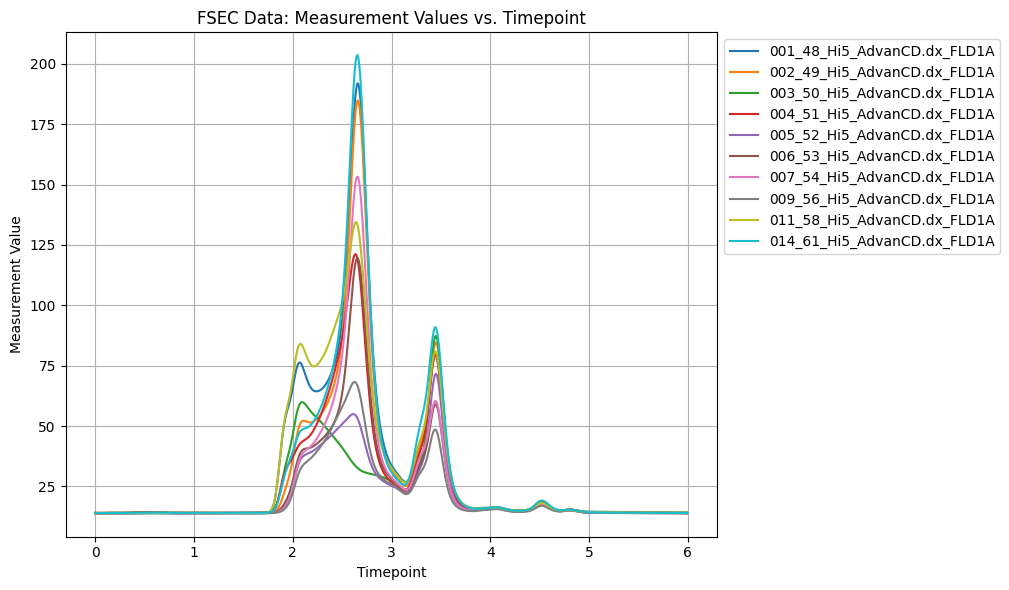

In [3]:
combined_fsec_df.drop(columns=['source_file'], inplace=True)
import matplotlib.pyplot as plt

# --- Plotting ---
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Get the measurement columns (all columns except 'Timepoint')
measurement_columns = combined_fsec_df.columns.drop('Timepoint')

for col in measurement_columns:
    plt.plot(combined_fsec_df['Timepoint'], combined_fsec_df[col], label=col)

plt.xlabel('Timepoint')
plt.ylabel('Measurement Value')
plt.title('FSEC Data: Measurement Values vs. Timepoint')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for the legend
plt.show()


In [4]:
combined_fsec_df['Timepoint']

0      0.00000
1      0.00720
2      0.01440
3      0.02160
4      0.02880
        ...   
829    5.96884
830    5.97604
831    5.98324
832    5.99044
833    5.99764
Name: Timepoint, Length: 834, dtype: float64

001_48_Hi5_AdvanCD.dx_FLD1A
--- Stats for column: 001_48_Hi5_AdvanCD.dx_FLD1A ---
  Original signal range: nan - nan
  Corrected signal range: nan - nan
  Number of detected peaks: 12
  Peak prominences: [1.64809198e-01 5.45091874e-02 8.89983873e-02 1.19579144e+01
 1.77957160e+02 5.28531764e+01 3.65425365e-01 2.61065467e+00
 2.10018194e-01 2.77454666e-02 2.32236747e-02 1.44660772e-02]
  Detected peak timepoints: [0.5544  0.98641 1.33201 2.06641 2.65682 3.44162 4.06083 4.52163 4.80963
 5.27043 5.73844 5.92564]
  Detected peak indices: [ 77 137 185 287 369 478 564 628 668 732 797 823]


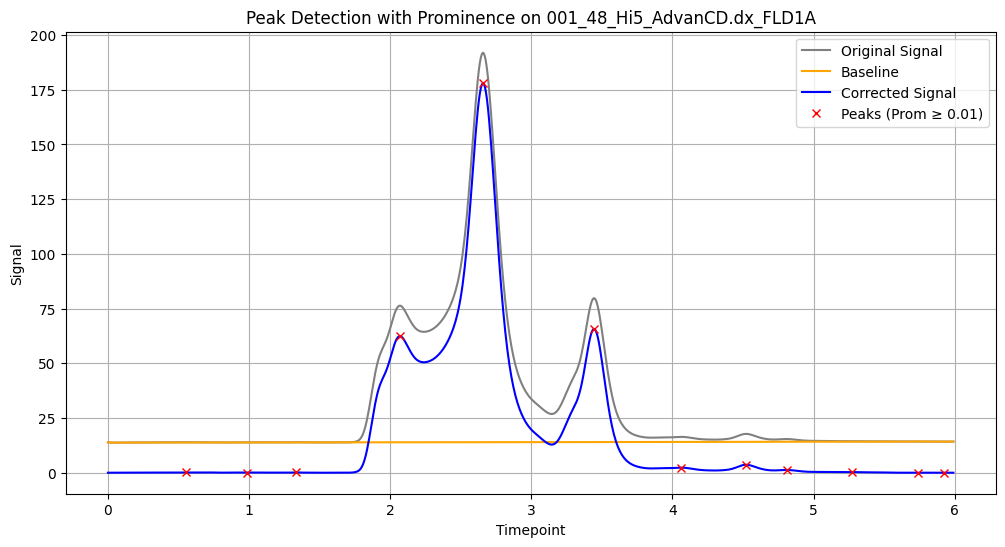

002_49_Hi5_AdvanCD.dx_FLD1A
--- Stats for column: 002_49_Hi5_AdvanCD.dx_FLD1A ---
  Original signal range: 13.96 - 184.80
  Corrected signal range: -0.00 - 170.77
  Number of detected peaks: 13
  Peak prominences: [2.61003471e-02 2.46721627e-01 4.60085896e-02 1.95702252e-02
 7.43078163e-01 1.70774262e+02 5.94310409e+01 7.05449925e-01
 3.41383558e+00 3.52855960e-01 2.67445203e-02 3.66587941e-02
 2.76574510e-02]
  Detected peak timepoints: [0.0936  0.54    1.08721 1.62001 2.10961 2.65682 3.44882 4.06803 4.52163
 4.80963 5.27763 5.77444 5.94004]
  Detected peak indices: [ 13  75 151 225 293 369 479 565 628 668 733 802 825]


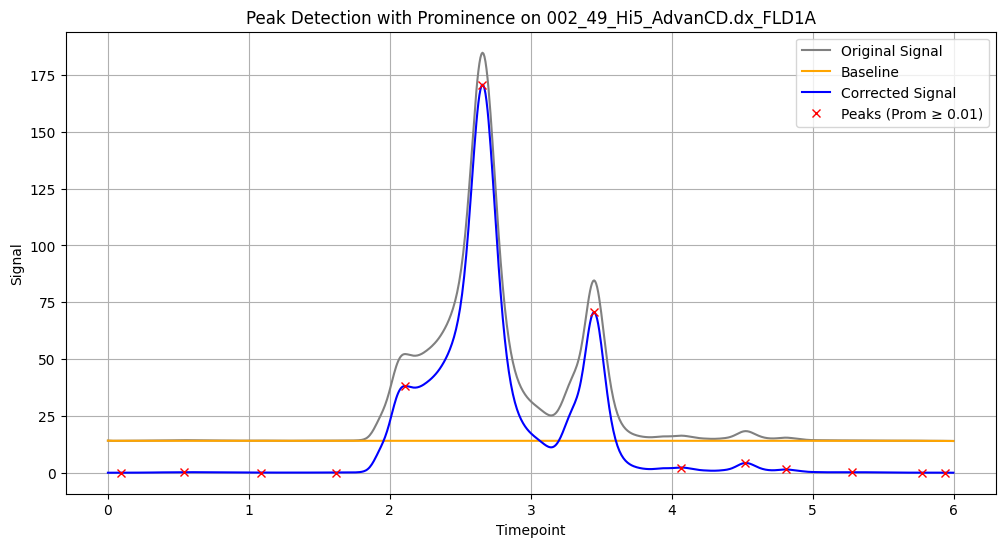

003_50_Hi5_AdvanCD.dx_FLD1A
--- Stats for column: 003_50_Hi5_AdvanCD.dx_FLD1A ---
  Original signal range: nan - nan
  Corrected signal range: nan - nan
  Number of detected peaks: 15
  Peak prominences: [2.11736090e-02 2.26111839e-01 4.43012189e-02 2.76385268e-02
 2.30174972e-02 1.35572333e-02 3.60955505e+01 7.32920369e+01
 6.06874064e-01 4.04669810e+00 2.45295799e-01 5.65314291e-02
 4.36042932e-02 1.60215744e-02 1.48220329e-02]
  Detected peak timepoints: [0.2736  0.5544  1.02961 1.15921 1.46881 1.58401 2.09521 3.44882 4.05363
 4.52163 4.79523 5.25603 5.63044 5.88244 5.96884]
  Detected peak indices: [ 38  77 143 161 204 220 291 479 563 628 666 730 782 817 829]


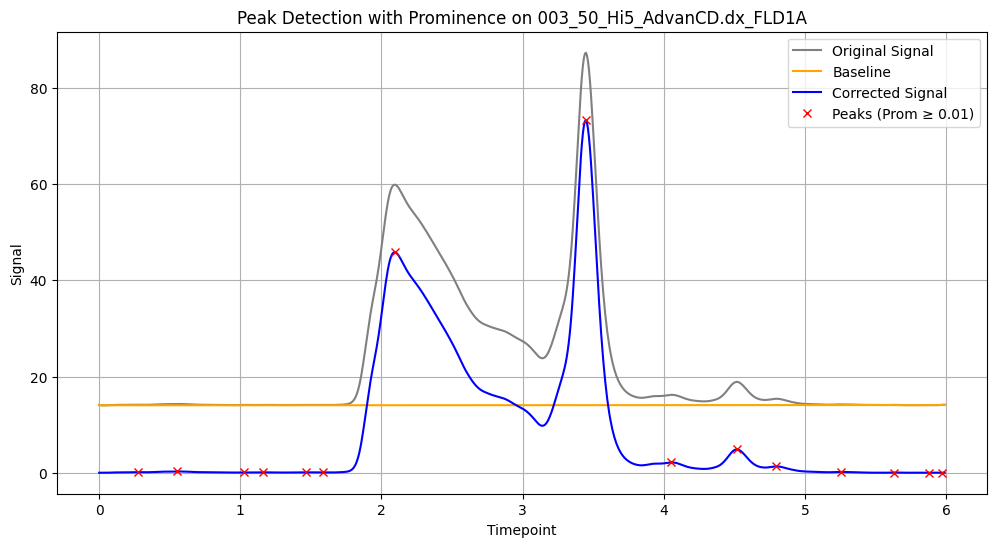

004_51_Hi5_AdvanCD.dx_FLD1A
--- Stats for column: 004_51_Hi5_AdvanCD.dx_FLD1A ---
  Original signal range: nan - nan
  Corrected signal range: nan - nan
  Number of detected peaks: 18
  Peak prominences: [1.26025458e-02 1.04591963e-02 2.37385045e-02 1.91277303e-01
 3.25635850e-02 7.23631501e-02 6.95088173e-02 1.18192021e-02
 1.07139865e+02 5.63282723e+01 7.23838479e-01 4.11687896e+00
 3.64258008e-01 3.53867590e-02 1.13882188e-02 1.12891989e-02
 6.07155340e-02 1.94238656e-02]
  Detected peak timepoints: [0.0216  0.144   0.2304  0.5184  0.79921 1.02961 1.28881 1.39681 2.63522
 3.44162 4.06083 4.52163 4.80243 5.19123 5.28483 5.64484 5.78884 5.94004]
  Detected peak indices: [  3  20  32  72 111 143 179 194 366 478 564 628 667 721 734 784 804 825]


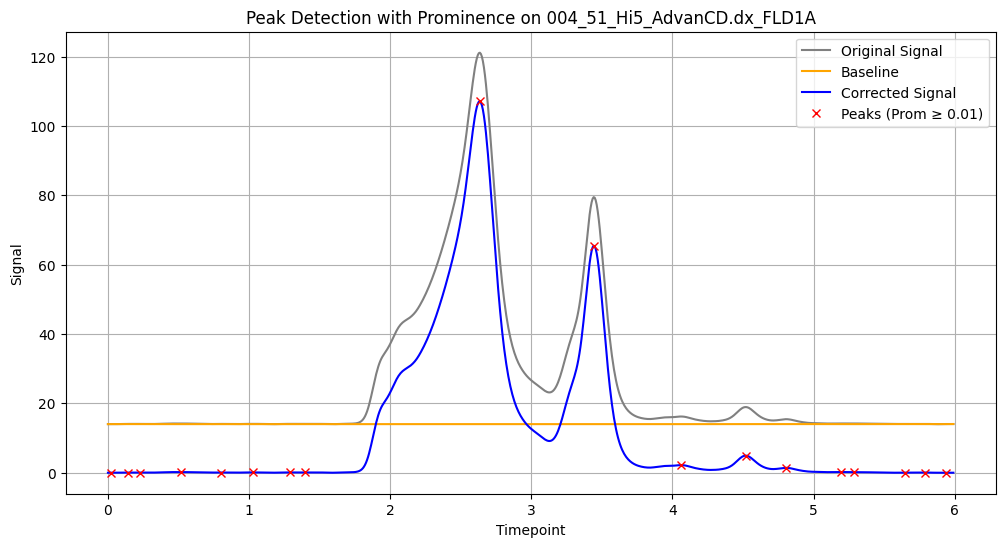

005_52_Hi5_AdvanCD.dx_FLD1A
--- Stats for column: 005_52_Hi5_AdvanCD.dx_FLD1A ---
  Original signal range: nan - nan
  Corrected signal range: nan - nan
  Number of detected peaks: 14
  Peak prominences: [1.62258284e-02 1.69566568e-01 2.35879642e-02 2.70637096e-02
 2.28797698e-02 7.16718634e-02 3.26830972e+01 5.76333317e+01
 7.00409794e-01 3.01154195e+00 3.11488537e-01 4.39598839e-02
 1.33386506e-02 5.28025428e-02]
  Detected peak timepoints: [0.0936  0.5544  0.88561 1.11601 1.35361 1.59841 2.61362 3.44882 4.06803
 4.52163 4.80243 5.29923 5.65204 5.92564]
  Detected peak indices: [ 13  77 123 155 188 222 363 479 565 628 667 736 785 823]


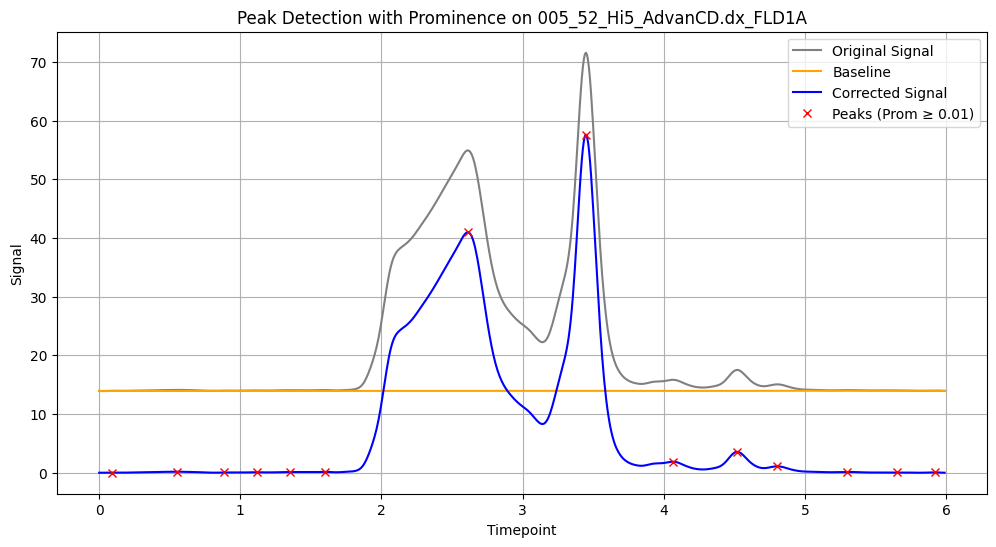

006_53_Hi5_AdvanCD.dx_FLD1A
--- Stats for column: 006_53_Hi5_AdvanCD.dx_FLD1A ---
  Original signal range: nan - nan
  Corrected signal range: nan - nan
  Number of detected peaks: 14
  Peak prominences: [1.38278904e-02 1.52151970e-01 2.02034233e-02 1.02279549e-02
 1.70028581e-02 1.05630703e+02 3.57258138e+01 8.67156711e-01
 2.89160501e+00 4.16661223e-01 1.10844823e-02 3.73435431e-02
 1.18620890e-02 7.93422432e-02]
  Detected peak timepoints: [0.3816  0.5184  1.12321 1.33201 1.50481 2.65682 3.44162 4.06083 4.52163
 4.80243 5.20563 5.27043 5.73124 5.92564]
  Detected peak indices: [ 53  72 156 185 209 369 478 564 628 667 723 732 796 823]


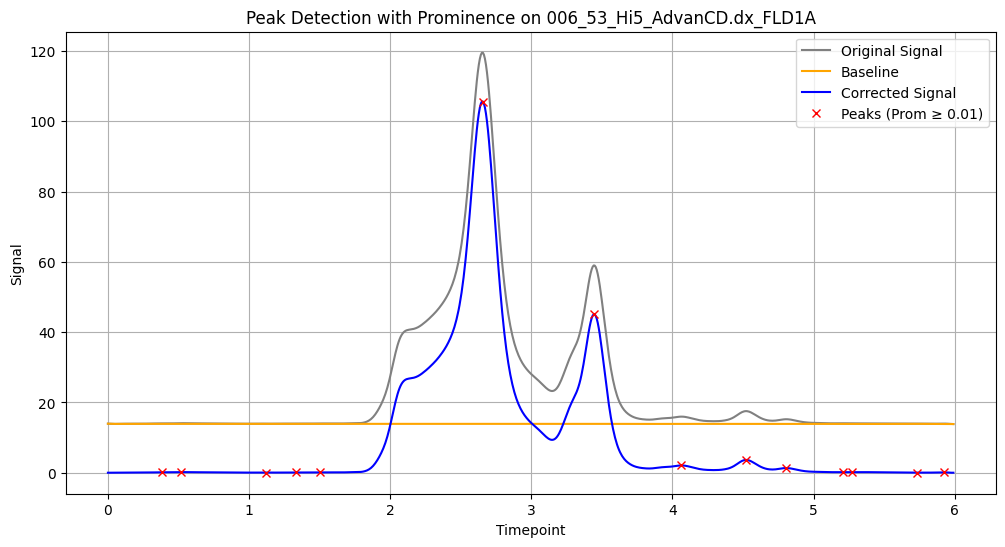

007_54_Hi5_AdvanCD.dx_FLD1A
--- Stats for column: 007_54_Hi5_AdvanCD.dx_FLD1A ---
  Original signal range: 13.68 - 153.24
  Corrected signal range: -0.00 - 139.42
  Number of detected peaks: 13
  Peak prominences: [2.13564065e-02 1.35440877e-01 4.94034577e-02 1.15215277e-02
 2.16662493e-02 1.39416125e+02 3.67791096e+01 8.27573655e-01
 2.87765379e+00 4.31090598e-01 3.84985768e-02 4.44330776e-02
 3.85923247e-02]
  Detected peak timepoints: [0.1872  0.5688  1.12321 1.36081 1.47601 2.65682 3.44162 4.06803 4.52163
 4.80963 5.30643 5.66644 5.87524]
  Detected peak indices: [ 26  79 156 189 205 369 478 565 628 668 737 787 816]


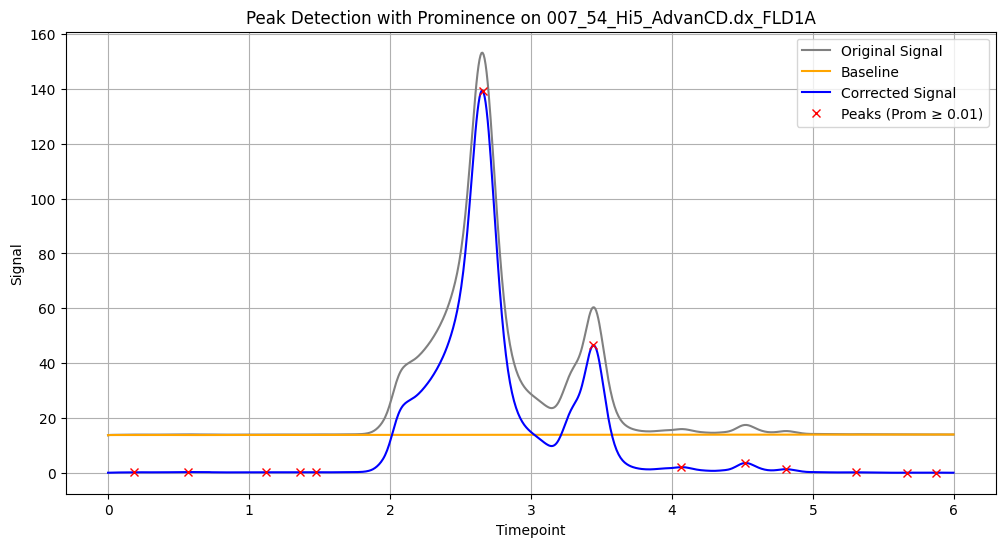

009_56_Hi5_AdvanCD.dx_FLD1A
--- Stats for column: 009_56_Hi5_AdvanCD.dx_FLD1A ---
  Original signal range: nan - nan
  Corrected signal range: nan - nan
  Number of detected peaks: 17
  Peak prominences: [1.45737384e-02 1.29065042e-02 2.73647465e-02 1.26066645e-01
 3.43865772e-02 3.19534829e-02 1.98270897e-02 1.49049511e-02
 3.57883105e-02 5.43763864e+01 2.67300301e+01 8.60883661e-01
 2.57152311e+00 4.36480918e-01 3.37910892e-02 1.25914644e-02
 8.00534325e-02]
  Detected peak timepoints: [0.2592  0.3888  0.5112  0.684   0.86401 1.05121 1.22401 1.53361 1.65601
 2.62802 3.44162 4.06083 4.52163 4.80243 5.33523 5.63764 5.83924]
  Detected peak indices: [ 36  54  71  95 120 146 170 213 230 365 478 564 628 667 741 783 811]


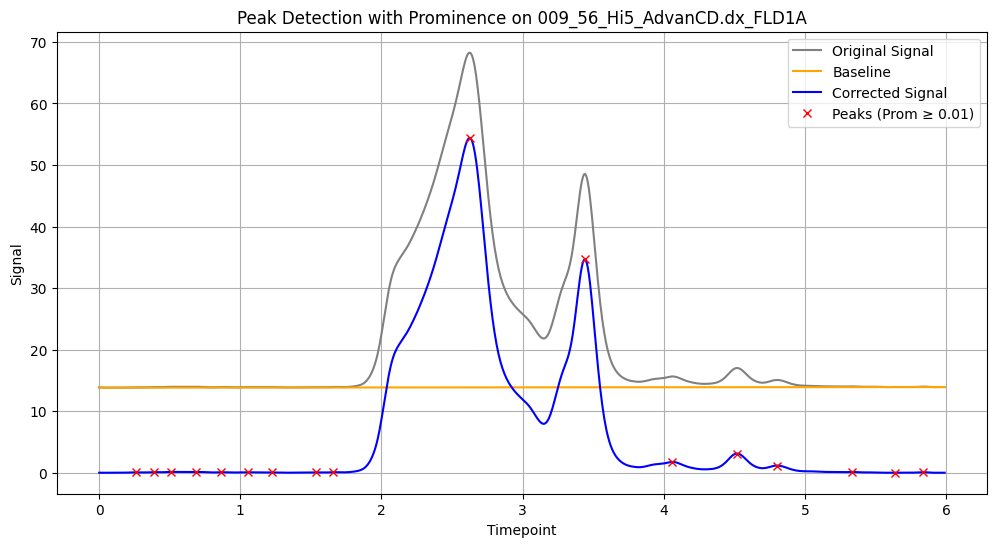

011_58_Hi5_AdvanCD.dx_FLD1A
--- Stats for column: 011_58_Hi5_AdvanCD.dx_FLD1A ---
  Original signal range: nan - nan
  Corrected signal range: nan - nan
  Number of detected peaks: 13
  Peak prominences: [1.26508119e-02 1.25637802e-01 3.01502123e-02 4.63854471e-02
 4.57107821e-02 1.54710678e-02 9.32051376e+00 1.20365798e+02
 5.41840838e+01 4.03445618e-01 3.15277868e+00 2.07700146e-01
 3.33669856e-02]
  Detected peak timepoints: [0.3096  0.5616  0.98641 1.24561 1.44721 1.61281 2.07361 2.64242 3.44162
 4.05363 4.52163 4.79523 5.81044]
  Detected peak indices: [ 43  78 137 173 201 224 288 367 478 563 628 666 807]


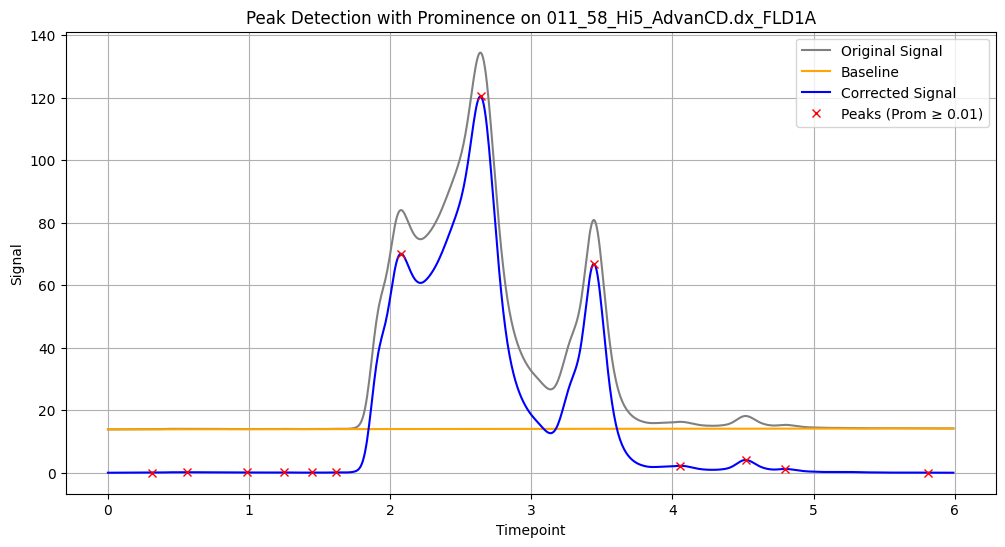

Peak indices: [ 43  78 137 173 201 224 288 367 478 563 628 666 807]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

def snip_baseline(signal, window_size):
    """Applies the SNIP baseline correction algorithm."""
    s_lls = np.log(np.log(np.sqrt(signal + 1) + 1) + 1)
    s_lls_filt = np.copy(s_lls)
    for m in range(1, window_size + 1):
        for i in range(m, len(s_lls_filt) - m):
            s_lls_filt[i] = min(s_lls_filt[i], (s_lls_filt[i - m] + s_lls_filt[i + m]) / 2)
    baseline = (np.exp(np.exp(s_lls_filt) - 1) - 1)**2 - 1
    corrected_signal = signal - baseline
    return corrected_signal, baseline

def find_peaks_with_prominence(combined_df, column_name, prominence=.02, baseline_window=10, plot=True):
    """
    Performs baseline correction and finds peaks based on prominence for a single column.

    Args:
        combined_df (pd.DataFrame): The combined DataFrame.
        column_name (str): The name of the column to process.
        prominence (float): The minimum prominence for peak detection.
        baseline_window (int): The window size for baseline correction.
        plot (bool): Whether to generate a plot.

    Returns:
        tuple: (peak_indices, corrected_signal, baseline, normalized_signal) or (None, None, None, None) if errors.
               peak_indices is a numpy array of integer indices.  corrected_signal, baseline, and normalized_signal
               are numpy arrays of floats.
    """
    if 'Timepoint' not in combined_df.columns:
        print("Error: 'Timepoint' column not found.")
        return None, None, None, None
    if column_name not in combined_df.columns:
        print(f"Error: Column '{column_name}' not found.")
        return None, None, None, None

    signal = combined_df[column_name].values
    timepoints = combined_df['Timepoint'].values

    # Baseline Correction
    corrected_signal, baseline = snip_baseline(signal, baseline_window)

    # Normalize the *original* signal for prominence calculation (important!)
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

    # Find Peaks on the *corrected* signal
    peak_indices, properties = scipy.signal.find_peaks(corrected_signal, prominence=prominence)

    # --- Debugging Stats ---
    print(f"--- Stats for column: {column_name} ---")
    print(f"  Original signal range: {np.min(signal):.2f} - {np.max(signal):.2f}")
    print(f"  Corrected signal range: {np.min(corrected_signal):.2f} - {np.max(corrected_signal):.2f}")
    print(f"  Number of detected peaks: {len(peak_indices)}")
    if len(peak_indices) > 0:
        print(f"  Peak prominences: {properties['prominences']}") # Key for debugging
        print(f"  Detected peak timepoints: {timepoints[peak_indices]}")
        print(f"  Detected peak indices: {peak_indices}")

    # Plotting
    if plot:
        plt.figure(figsize=(12, 6))
        plt.plot(timepoints, signal, label='Original Signal', color='gray')
        plt.plot(timepoints, baseline, label='Baseline', color='orange')
        plt.plot(timepoints, corrected_signal, label='Corrected Signal', color='blue')
        plt.plot(timepoints[peak_indices], corrected_signal[peak_indices], "x", color='red',
                 label=f'Peaks (Prom ≥ {prominence:.2f})')

        plt.xlabel('Timepoint')
        plt.ylabel('Signal')
        plt.title(f'Peak Detection with Prominence on {column_name}')
        plt.legend()
        plt.grid(True)
        plt.show()
    return peak_indices, corrected_signal, baseline, normalized_signal


# --- Example Usage (assuming you have your combined_df) ---
# Create some sample data (replace with your actual loading)
# In a real application, you would load your data as before.

# Now, call the peak detection function:
for col in combined_fsec_df.columns.tolist()[1:-1]:
    print(col)
    peak_indices, corrected_signal, baseline, normalized_signal = find_peaks_with_prominence(
        combined_fsec_df,
        column_name=col,
        prominence=.01,      # Adjust this
        baseline_window=100,  # Adjust
        plot=True
    )
    combined_fsec_df.loc[:, col] = corrected_signal

if peak_indices is not None:  # Check if peaks were found
    print(f"Peak indices: {peak_indices}")

In [6]:
combined_fsec_df['retention_time'] = 0

In [7]:
combined_fsec_df

,Timepoint,001_48_Hi5_AdvanCD.dx_FLD1A,002_49_Hi5_AdvanCD.dx_FLD1A,003_50_Hi5_AdvanCD.dx_FLD1A,004_51_Hi5_AdvanCD.dx_FLD1A,005_52_Hi5_AdvanCD.dx_FLD1A,006_53_Hi5_AdvanCD.dx_FLD1A,007_54_Hi5_AdvanCD.dx_FLD1A,009_56_Hi5_AdvanCD.dx_FLD1A,011_58_Hi5_AdvanCD.dx_FLD1A,014_61_Hi5_AdvanCD.dx_FLD1A,retention_time
0,0.00000,-1.065814e-14,7.105427e-15,5.329071e-15,-7.105427e-15,-7.105427e-15,0.000000e+00,5.329071e-15,-3.552714e-15,-5.329071e-15,14.055223,0
1,0.00720,1.776357e-15,7.105427e-15,1.065814e-14,3.041882e-03,2.283210e-03,1.306486e-03,1.146732e-02,2.067272e-03,1.222016e-03,14.040453,0
2,0.01440,0.000000e+00,7.105427e-15,-1.776357e-15,1.083372e-02,5.140824e-03,5.407293e-04,4.799728e-02,5.898445e-03,2.375492e-03,14.029058,0
3,0.02160,-1.776357e-15,-1.776357e-15,8.881784e-15,1.260255e-02,3.042512e-03,0.000000e+00,7.358978e-02,4.577900e-03,7.267033e-04,14.020384,0
4,0.02880,3.552714e-15,-1.776357e-15,0.000000e+00,7.580157e-03,2.979196e-04,-5.329071e-15,7.588500e-02,1.225013e-03,1.065814e-14,14.013768,0
...,...,...,...,...,...,...,...,...,...,...,...,...
829,5.96884,9.525379e-04,1.423371e-02,1.482203e-02,1.199341e-02,5.549384e-03,7.020121e-03,1.156261e-04,6.099065e-03,6.258648e-03,14.021380,0
830,5.97604,3.219004e-05,2.109164e-03,1.391612e-02,6.503788e-03,2.248777e-04,0.000000e+00,2.221077e-03,4.333078e-03,5.788996e-03,14.002432,0
831,5.98324,0.000000e+00,8.881784e-15,6.243175e-03,1.583996e-03,1.776357e-15,8.881784e-15,2.249960e-03,1.071096e-03,2.590822e-03,13.988618,0
832,5.99044,-8.881784e-15,7.105427e-15,0.000000e+00,1.776357e-15,0.000000e+00,3.552714e-15,8.060852e-04,-1.421085e-14,-7.105427e-15,13.981584,0


In [8]:
from hplc.quant import Chromatogram

# Load the signal trace as a Chromatogram object and crop between 10 and 20 min.
chrom = Chromatogram(combined_fsec_df, cols={'time':'Timepoint', 'signal': combined_fsec_df.columns[1]})

# Pass a prominence filter, fit the peaks, and show the result

In [9]:
chrom.crop([1, 5])

[<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Timepoint', ylabel='001_48_Hi5_AdvanCD.dx_FLD1A'>]

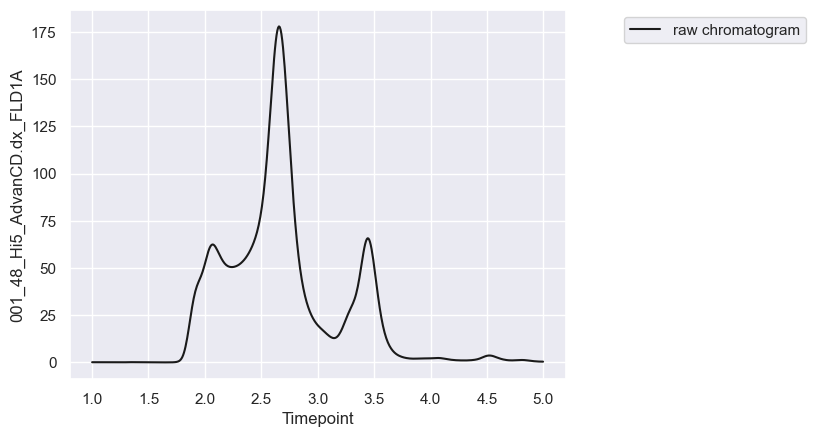

In [10]:
chrom.show()

Deconvolving mixture: 100%|██████████| 1/1 [00:00<00:00, 15.54it/s]


[<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Timepoint', ylabel='001_48_Hi5_AdvanCD.dx_FLD1A (baseline corrected)'>]

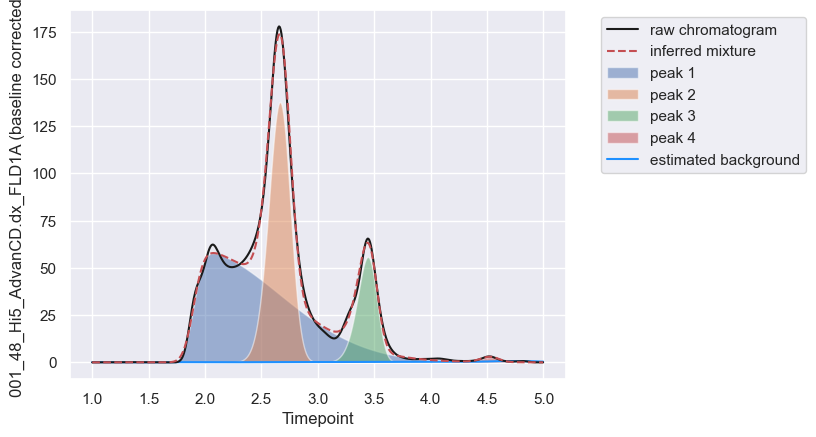

In [11]:
peaks = chrom.fit_peaks(buffer=0)
chrom.show()

In [12]:
scores = chrom.assess_fit()
scores.head()


-------------------Chromatogram Reconstruction Report Card----------------------

Reconstruction of Peaks

A+, Success:  Peak Window 1 (t: 1.735 - 4.925) R-Score = 0.9987

Signal Reconstruction of Interpeak Windows
                  
C-, Needs Review:  Interpeak Window 1 (t: 1.001 - 1.728) R-Score = 1.1704 & Fano Ratio = 0.0008
Interpeak window 1 is not well reconstructed by mixture, but has a small Fano factor
compared to peak region(s). This is likely acceptable, but visually check this region.

C-, Needs Review:  Interpeak Window 2 (t: 4.932 - 4.997) R-Score = 1.1607 & Fano Ratio = 0
Interpeak window 2 is not well reconstructed by mixture, but has a small Fano factor
compared to peak region(s). This is likely acceptable, but visually check this region.


--------------------------------------------------------------------------------


,window_id,time_start,time_end,signal_area,inferred_area,signal_variance,signal_mean,signal_fano_factor,reconstruction_score,window_type,applied_tolerance,status
0,1,1.00081,1.72801,2.520453,2.949828,0.000593,1.490640e-02,0.039768,1.170356,interpeak,0.01,needs review
1,2,4.93203,4.99683,1.000000,1.160724,0.000000,1.000000e-09,0.000000,1.160724,interpeak,0.01,needs review
0,1,1.73521,4.92483,14288.042234,14269.094695,1649.328216,3.217802e+01,51.256356,0.998674,peak,0.01,valid


In [13]:
# combined_fsec_df = combined_fsec_df.loc[100:800, combined_fsec_df.columns[:-1]]

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.optimize import curve_fit
from scipy.special import erf
from itertools import combinations
from ipywidgets import interact, IntSlider, FloatSlider, Layout, HBox, Label, Dropdown, interactive_output, VBox
from IPython.display import display

def calculate_durbin_watson(residuals):
    """Calculates the Durbin-Watson statistic."""
    diff_residuals = np.diff(residuals)
    dw = np.sum(diff_residuals**2) / np.sum(residuals**2)
    return dw * (len(residuals) / (len(residuals) - 1))

def find_optimal_sg_window(signal, timepoints, polynomial_order=2, min_window=5, max_window=151):
    """Finds optimal Savitzky-Golay window size (Durbin-Watson)."""
    best_window = min_window
    best_dw = 0
    for window_size in range(min_window, max_window + 1, 2):
        if window_size >= len(signal):
            break
        smoothed_signal = scipy.signal.savgol_filter(signal, window_size, polynomial_order)
        residuals = signal - smoothed_signal  # Residuals from *original* signal
        dw = calculate_durbin_watson(residuals)
        if abs(dw - 2) < abs(best_dw - 2):
            best_dw = dw
            best_window = window_size
    return best_window

def snip_baseline(signal, window_size):
    """Applies the SNIP baseline correction algorithm."""
    s_lls = np.log(np.log(np.sqrt(signal + 1) + 1) + 1)
    s_lls_filt = np.copy(s_lls)
    for m in range(1, window_size + 1):
        for i in range(m, len(s_lls_filt) - m):
            s_lls_filt[i] = min(s_lls_filt[i], (s_lls_filt[i - m] + s_lls_filt[i + m]) / 2)
    baseline = (np.exp(np.exp(s_lls_filt) - 1) - 1)**2 - 1
    corrected_signal = signal - baseline
    return corrected_signal, baseline

def normalize_signal(signal, timepoints):
    """
    Performs baseline correction and returns the corrected signal, baseline,
    and optimal SG window size.  This is Step 1.  Crucially, this function
    *returns* the baseline.  The corrected signal has the baseline subtracted.
    """
    sg_window_size = find_optimal_sg_window(signal, timepoints)
    print(f"Optimal SG window size: {sg_window_size}")
    corrected_signal, baseline = snip_baseline(signal, sg_window_size)
    return corrected_signal, baseline, sg_window_size

def find_main_peaks(corrected_signal, timepoints, prominence, width, sg_window_size):
    """
    Finds main peaks using prominence and width on the *corrected* signal.
    This is Step 2.  The corrected signal is normalized for peak finding.
    """
    # Normalize the *corrected* signal for peak finding.
    normalized_corrected_signal = (corrected_signal - np.min(corrected_signal)) / (np.max(corrected_signal) - np.min(corrected_signal))
    peak_indices, _ = scipy.signal.find_peaks(normalized_corrected_signal, prominence=prominence, width=width)
    return peak_indices, normalized_corrected_signal # Return normalized signal

def detect_shoulders(normalized_corrected_signal, timepoints, peak_indices, sg_window_size, baseline, shoulder_curvature, width):
    """
    Detects shoulders in the chromatogram after initial peak finding.

    Args:
        normalized_corrected_signal: Baseline-corrected and normalized signal.
        timepoints: Corresponding time values.
        peak_indices: Indices of the main peaks (found in Step 2).
        sg_window_size: Optimal Savitzky-Golay window size.
        shoulder_curvature: Minimum curvature (prominence for 2nd deriv. peaks).
        baseline: the calculated baseline

    Returns:
        shoulder_indices: NumPy array of shoulder indices.
    """

    # 1. Calculate Second Derivative
    second_derivative = scipy.signal.savgol_filter(normalized_corrected_signal, window_length=sg_window_size, polyorder=2, deriv=2)

    # 2. Estimate Noise in Second Derivative (thrsd)
    h_values = []
    for i in range(1, len(second_derivative) - 1):
        h = abs(second_derivative[i] - (second_derivative[i-1] + second_derivative[i+1]) / 2)
        h_values.append(h)
    noise_estimate_sd = np.median(h_values)
    thrsd = 5 * noise_estimate_sd  # Threshold on second derivative

    # 3. Find Potential Shoulders (negative peaks in 2nd deriv)
    shoulder_peaks_neg, _ = scipy.signal.find_peaks(-second_derivative, prominence=thrsd, width=width/4)

    # 4. Signal Height Thresholds
    thrh1 = 3 * np.std(baseline)  # Dynamic threshold based on baseline noise
    thrh2 = 0  # Minimum signal height (can be adjusted)

    shoulder_indices = []

    # 5. find valleys
    valley_indices, _ = scipy.signal.find_peaks(-normalized_corrected_signal, prominence=0.1, width=width)

    # 6. Filter Shoulders
    for shoulder_idx in shoulder_peaks_neg:
        is_valid_shoulder = False

        # Check Signal Height
        if normalized_corrected_signal[shoulder_idx] >= thrh1 and normalized_corrected_signal[shoulder_idx] >= thrh2:

            # Find Nearest Peak and Valley
            nearest_peak = None
            nearest_valley = None
            min_peak_dist = float('inf')
            min_valley_dist = float('inf')

            for peak_idx in peak_indices:
                dist = abs(shoulder_idx - peak_idx)
                if dist < min_peak_dist:
                    min_peak_dist = dist
                    nearest_peak = peak_idx

            for valley_idx in valley_indices:
                dist = abs(shoulder_idx - valley_idx)
                if dist < min_valley_dist:
                    min_valley_dist = dist
                    nearest_valley = valley_idx

            # Peak-Valley-Shoulder Constraint
            if nearest_peak is not None and nearest_valley is not None:
                if (nearest_peak < shoulder_idx < nearest_valley) or \
                   (nearest_valley < shoulder_idx < nearest_peak):
                    is_valid_shoulder = True

        # Add if valid, not a duplicate, and not already a peak
        if is_valid_shoulder and shoulder_idx not in shoulder_indices and shoulder_idx not in peak_indices:
            shoulder_indices.append(shoulder_idx)

    return np.array(shoulder_indices, dtype=int)

def analyze_chromatogram(combined_df, column_name, prominence=0.5, width=20,
                        shoulder_curvature=0.005, max_peaks_per_window=3, plot=True):
    """Analyzes a chromatogram column."""
    if 'Timepoint' not in combined_df.columns or column_name not in combined_df.columns:
        print("Error: Required column(s) not found.")
        return None

    signal = combined_df[column_name].values
    timepoints = combined_df['Timepoint'].values

    # --- Step 1: Baseline Correction and Normalization ---
    _, _, sg_window_size = normalize_signal(signal, timepoints)
    
    # --- Step 2: Find Main Peaks ---
    peak_indices, normalized_corrected_signal = find_main_peaks(signal, timepoints, prominence, width, sg_window_size)

    if plot:
        plt.figure(figsize=(12, 6))
        plt.plot(timepoints, normalized_corrected_signal, label='Corrected Signal', color='blue')
        plt.plot(timepoints[peak_indices], normalized_corrected_signal[peak_indices], "x", color='red', label='Peaks')
        plt.title('Step 2: Main Peak Detection')
        plt.xlabel('Timepoint')
        plt.ylabel('Signal')
        plt.legend()
        plt.grid(True)
        plt.show()

    # --- Step 3: Detect Shoulders ---
    shoulder_indices = detect_shoulders(normalized_corrected_signal, timepoints, peak_indices,
                                         sg_window_size, shoulder_curvature, baseline, width=width) # Added baseline

    if plot:  # Plot after Step 3
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
        ax1.plot(timepoints, signal, label='Original Signal', color='gray') #plot original
        ax1.plot(timepoints, corrected_signal, label='Corrected Signal', color='blue')
        ax1.plot(timepoints, baseline, label='Baseline', color='orange')
        ax1.plot(timepoints[peak_indices], corrected_signal[peak_indices], "x", color='red', label='Peaks')
        ax1.plot(timepoints[shoulder_indices], corrected_signal[shoulder_indices], "o",
                 color='green', label='Shoulders', markersize=5)
        ax1.set_title('Peak and Shoulder Detection')
        ax1.set_ylabel('Signal')
        ax1.legend()
        ax1.grid(True)

        # Plot second derivative in the second subplot
        second_derivative = scipy.signal.savgol_filter(normalized_corrected_signal, window_length=sg_window_size, polyorder=2, deriv=2)
        ax2.plot(timepoints, -second_derivative * 10, label='-2nd Deriv (Scaled)', color='purple')  # Scaled for visibility
        ax2.set_xlabel('Timepoint')
        ax2.set_ylabel('Second Derivative (Scaled)')
        ax2.grid(True)
        ax2.legend()
        plt.tight_layout()
        plt.show()


    # --- Placeholder for Step 4 (to be implemented later) ---
    print("Step 4 (Fitting) will be implemented next.")


    results = {
        'column_name': column_name,
        'peak_indices': peak_indices,
        'shoulder_indices': shoulder_indices,  # Now including shoulder indices
        'corrected_signal': normalized_corrected_signal,  # Keep corrected_signal
        'baseline': baseline,
        'sg_window_size': sg_window_size
    }
    return results

In [57]:
combined_fsec_df = combined_fsec_df.loc[100:800]

In [58]:
combined_fsec_df.columns[0]

'Timepoint'

Optimal SG window size: 5


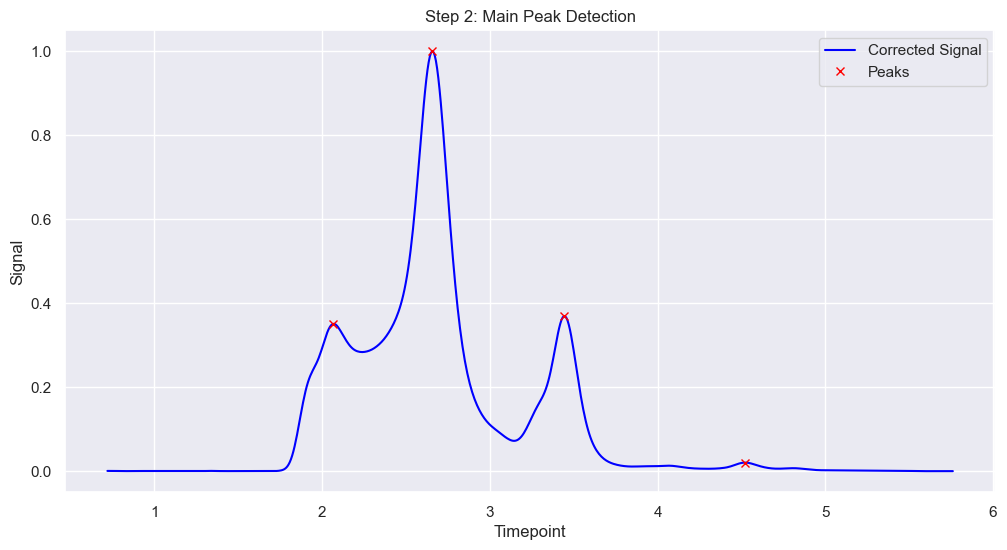

ValueError: x and y must have same first dimension, but have shapes (701,) and (834,)

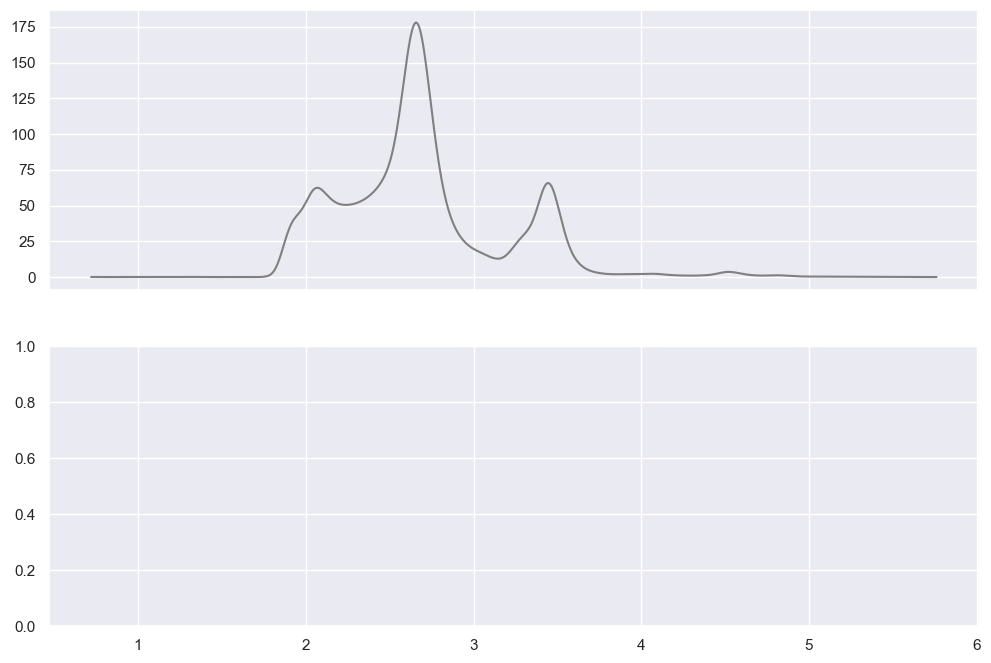

In [60]:
results1 = analyze_chromatogram(combined_fsec_df, combined_fsec_df.columns[1], prominence=0.01, width=10, plot=True)